In [2]:
import os
from difPy import dif
from PIL import Image
import shutil
from os.path import exists
import matplotlib.pyplot as plt

In [35]:
# Cleaning all pictures that were scraped
my_file = 'pic'

# Delete duplicata
dif( f"/home/loyk/Bureau/Projet/data/{my_file}", delete = True, show_output=False, similarity="normal")
# Delete similar images
dif( f"/home/loyk/Bureau/Projet/data/{my_file}", delete = True, show_output=False, similarity="low")

filename = my_file
delete_webp = 0
delete_mp4 = 0
types = []

os.chdir(f"/home/loyk/Bureau/Projet/data/{my_file}")

# Check files type
for count, f in enumerate(os.listdir()):
  f_name, f_ext = os.path.splitext(f)

  if f_ext not in types:
    types.append(f_ext)

print(f"The file types present are : {types}")
answer = input("Do you want to continue ? (y/n)")

if answer == 'y':
  # Delete videos
  for count, f in enumerate(os.listdir()):
    f_name, f_ext = os.path.splitext(f)

    if f_ext == '.mp4':
      os.remove(f)
      delete_mp4 += 1

  # Convert if necessary and change files name
  for count, f in enumerate(os.listdir()):
    f_name, f_ext = os.path.splitext(f)
    f_rename = filename + str(count)

    if f_ext == '.webp':
      img = Image.open(f).convert('RGB')
      img.save(f_rename + '.jpg', 'jpeg')
      os.remove(f)
      delete_webp += 1

    else:
      new_name = f'{f_rename}{f_ext}'
      os.rename(f, new_name)

  print( f"{delete_mp4} .mp4 files were deleted")
  print( f"{delete_webp} .webp files were converted to jpg")

else:
  print('See you arround')

difPy preparing files: [1369/1369] [100%]
difPy comparing images: [1368/1368] [100%]
Found 172 pair(s) of duplicate/similar image(s) in 230.4861 seconds.


Are you sure you want to delete all lower quality matched images? 
! This cannot be undone. (y/n) y



Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/278930296_570710314174866_7740826357419447639_n.webp
Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/284456695_566972998115626_8208538235372107800_n.webp
Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/277917437_963800744332535_4892536041539553338_n.webp
Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/285042832_543582273876607_3816078474905704015_n.webp
Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/278566987_521291016051087_4790144920668618633_n.webp
Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/healthfullyfoods478.jpg
Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/277122495_2818717788434900_118877835277307763_n.webp
Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/275847383_1614671522259137_6188054512507280420_n.webp
Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/279812309_466916105227106_7367762678922900852_n.webp
Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/275575908_5072188586

Are you sure you want to delete all lower quality matched images? 
! This cannot be undone. (y/n) y



Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/277924696_368200721853727_8296739274656253392_n.webp
Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/275424100_1368602796897934_3517635484214171210_n.webp
Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/281564518_545058340342813_8431226362015950516_n.webp
Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/277417268_688440459274662_3091310594184003305_n.webp
Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/277591187_369805848357520_7315751618087689557_n.webp
Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/275829306_1163526087725341_7160123436436785342_n.webp
Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/274879275_478115820623126_4122563532881260565_n.webp
Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/277940321_698037308183696_4828283341223055703_n.webp
Deleted file: /home/loyk/Bureau/Projet/data/pic_copy/280217243_5157542570958775_3830558435960277445_n.webp
Deleted file: /home/loyk/Bureau/Projet/dat

Do you want to continue ? (y/n) y


0 .mp4 files were deleted
501 .webp files were converted to jpg


In [ ]:
# Once interesting pictures are labeled, move pictures with a .txt file to another folder
original_path = '/home/loyk/Bureau/Projet/data/pic/'
new_path = '/home/loyk/Bureau/Projet/data/pic_cleaned/'

os.chdir(original_path)

count = 0

for f in os.listdir():
    f_name, f_ext = os.path.splitext(f)
    
    if f == 'classes.txt':
        shutil.copy(f"{original_path}classes.txt", f"{new_path}classes.txt")
        
    if f_ext == '.txt':
        pass
    
    if f_ext == '.jpg':
        if exists(f"{original_path}{f_name}.txt"):
            shutil.move(f"{original_path}{f_name}.jpg", f"{new_path}{f_name}.jpg")
            shutil.move(f"{original_path}{f_name}.txt", f"{new_path}{f_name}.txt")
            count+=1
            
print(f"{count} pictures moved")            

242 pictures moved


In [69]:
def count_labels(labels_folder_path, classes_path):
    os.chdir(labels_folder_path)
    ingredients = []
    ingredients_count = {}

    for file in os.listdir():
        file_name, file_ext = os.path.splitext(file)

        if file == 'classes.txt':
            pass

        elif '.txt' == file_ext:
            opened = open(file)

            for line in opened:
                if line[0] == ' ':
                    pass
                
                else:
                    ingredients.append(line[:2].rstrip())

    for ingredient in ingredients:
        if ingredient not in ingredients_count:
            ingredients_count.update({ingredient: 1})

        elif ingredients_count[ingredient] is not None:
            ingredients_count[ingredient] +=1

    opened = open(classes_path)
    classes = {}
    
    for count, line in enumerate(opened):
        line = line.rstrip()
        classes.update({line: count})

    classes
    result = {}
    
    for ingredient in classes:
        for ingredient_count in ingredients_count:
            if int(classes[ingredient]) == int(ingredient_count):
                result.update({ingredient: ingredients_count[ingredient_count]})

    return(result)

In [70]:
count_labels_result = count_labels('/home/loyk/Bureau/Projet/data/pic_cleaned', '/home/loyk/Bureau/Projet/data/pic_cleaned/classes.txt')
count_labels_result

{'egg': 466,
 'cucumber': 5,
 'tomato': 106,
 'fish': 12,
 'olive': 2,
 'avocado': 103,
 'strawberry': 32}

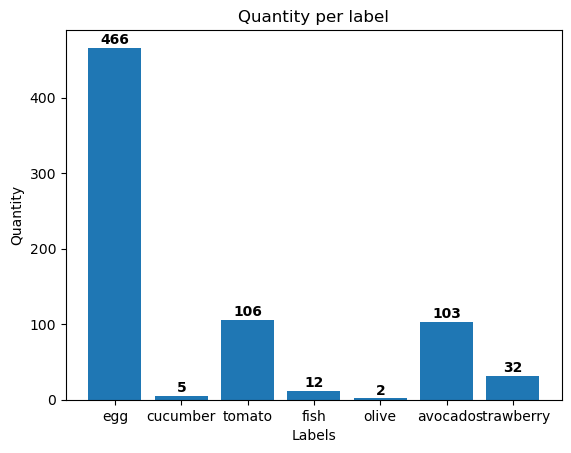

In [71]:
plt.bar(range(len(count_labels_result)), list(count_labels_result.values()))
plt.xticks(range(len(count_labels_result)), list(count_labels_result.keys()))

for i, v in enumerate(count_labels_result.values()):
    plt.text(i, v+5, str(v), ha='center', fontweight='bold')

plt.title('Quantity per label')
plt.xlabel('Labels')
plt.ylabel('Quantity')

plt.show()

In [72]:
# Make a dictionary listing all the labels in each photo
pictures_dict = {}
classes = ['egg', 'cucumber', 'tomato', 'fish', 'olive', 'avocado', 'strawberry']

for file in os.listdir():
    file_name, file_ext = os.path.splitext(file)
    
    if file == 'classes.txt':
        pass
    
    elif '.txt' == file_ext:
        opened = open(file)
        
        for line in opened:
            label = int(line[:2].rstrip())
            
            if line[0] == ' ':
                pass
            
            else:
                label = int(line[:2].rstrip())
                
                if file_name not in pictures_dict:
                    pictures_dict[file_name] = {classes[label]: 1}
                    
                else:
                    if classes[label] in pictures_dict[file_name]:
                        pictures_dict[file_name][classes[label]] += 1
                        
                    else:
                        pictures_dict[file_name][classes[label]] = 1
                        
print(pictures_dict)

{'pic836': {'egg': 2, 'avocado': 1}, 'pic167': {'egg': 1}, 'pic40': {'egg': 4}, 'pic219': {'egg': 3, 'avocado': 1}, 'pic374': {'egg': 2}, 'pic977': {'egg': 1, 'avocado': 1}, 'pic207': {'egg': 2}, 'pic659': {'egg': 2, 'avocado': 1}, 'pic74': {'egg': 2}, 'pic677': {'egg': 2, 'tomato': 4}, 'pic791': {'egg': 2}, 'pic89': {'egg': 2}, 'pic1035': {'egg': 1, 'avocado': 1}, 'pic1105': {'egg': 1}, 'pic752': {'egg': 4}, 'pic71': {'egg': 4}, 'pic1024': {'egg': 1, 'avocado': 1}, 'pic945': {'egg': 1, 'strawberry': 1}, 'pic311': {'egg': 2, 'avocado': 1, 'tomato': 1}, 'pic440': {'egg': 1}, 'pic181': {'egg': 2}, 'pic223': {'egg': 2, 'tomato': 2}, 'pic1132': {'tomato': 1, 'egg': 4, 'avocado': 1}, 'pic1177': {'egg': 4}, 'pic232': {'avocado': 1}, 'pic403': {'egg': 2}, 'pic1104': {'egg': 2, 'fish': 2, 'tomato': 4, 'olive': 1}, 'pic313': {'egg': 1}, 'pic1025': {'egg': 4}, 'pic77': {'egg': 1}, 'pic996': {'avocado': 1, 'egg': 2}, 'pic878': {'egg': 2, 'avocado': 1, 'fish': 3}, 'pic333': {'egg': 1, 'tomato': 1,

In [73]:
pictures_count = {}

for picture in pictures_dict:
    for ingredient in pictures_dict[picture]:
        if ingredient in pictures_count:
            pictures_count[ingredient] += 1
            
        else:
            pictures_count[ingredient] = 1
            
pictures_count

{'egg': 197,
 'avocado': 89,
 'tomato': 45,
 'strawberry': 8,
 'fish': 9,
 'olive': 2,
 'cucumber': 1}

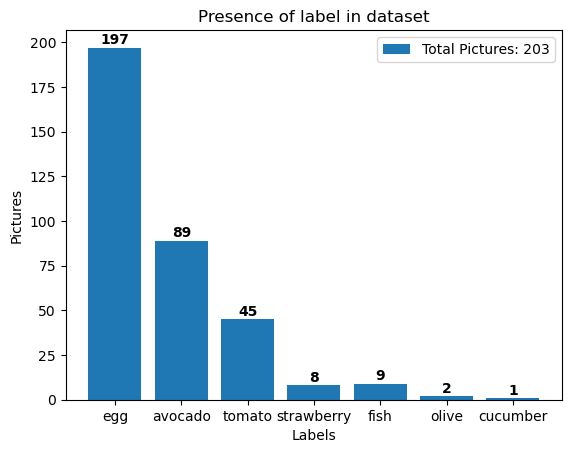

In [74]:
total_pictures = len(pictures_dict)
 
plt.bar(range(len(pictures_count)), list(pictures_count.values()))
plt.xticks(range(len(pictures_count)), list(pictures_count.keys()))

for i, v in enumerate(pictures_count.values()):
    plt.text(i, v+2, str(v), ha='center', fontweight='bold')

plt.title('Presence of label in dataset')
plt.xlabel('Labels')
plt.ylabel('Pictures')
plt.legend([f"Total Pictures: {total_pictures}"]) 
plt.show()

In [75]:
count_labels_result

{'egg': 466,
 'cucumber': 5,
 'tomato': 106,
 'fish': 12,
 'olive': 2,
 'avocado': 103,
 'strawberry': 32}

In [76]:
pictures_count

{'egg': 197,
 'avocado': 89,
 'tomato': 45,
 'strawberry': 8,
 'fish': 9,
 'olive': 2,
 'cucumber': 1}

In [77]:
# Calculate what 80% of each label corresponds to
for k in count_labels_result:
    print(f"{count_labels_result[k]*0.8} labels to train {k}")

372.8 labels to train egg
4.0 labels to train cucumber
84.80000000000001 labels to train tomato
9.600000000000001 labels to train fish
1.6 labels to train olive
82.4 labels to train avocado
25.6 labels to train strawberry


In [42]:
# If I take 80% of the egg label, according to the law of large numbers the other labels should also be around 80%
egg_count = 0
count = 0
original_path = '/home/loyk/Bureau/Projet/data/pic_cleaned_copy/'
new_path = '/home/loyk/Bureau/Projet/data/dataset_copy/train/'

for picture in pictures_dict:
    if 'egg'in pictures_dict[picture]: 
        if egg_count <= 372 and (pictures_dict[picture]['egg'] + egg_count)<= 372:
            egg_count += pictures_dict[picture]['egg']
            shutil.move(f"{original_path}{picture}.jpg", f"{new_path}pictures/{picture}.jpg")
            shutil.move(f"{original_path}{picture}.txt", f"{new_path}labels/{picture}.txt")
            count += 1
            
print(f"{count} pictures and labels moved to train folder")

157 pictures and labels moved to train folder


In [79]:
# Check if all the train labels corresponds approximately to 80%
count_labels('/home/loyk/Bureau/Projet/data/dataset/train/labels', '/home/loyk/Bureau/Projet/data/pic_cleaned/classes.txt')

{'egg': 372,
 'cucumber': 5,
 'tomato': 68,
 'fish': 10,
 'olive': 2,
 'avocado': 77,
 'strawberry': 20}

In [44]:
os.chdir('/home/loyk/Bureau/Projet/data/pic_cleaned_copy')
count=0

for file in os.listdir():
    file_name, file_ext = os.path.splitext(file)
    
    if file_ext == '.jpg':
        count+=1
        
print(f"{count} pictures left")

46 pictures left


In [46]:
folders = ['test', 'val']
original_path = '/home/loyk/Bureau/Projet/data/pic_cleaned/'

for folder in folders:  
    new_path = f"/home/loyk/Bureau/Projet/data/dataset/{folder}/"
    count=0
    
    for file in os.listdir():
        file_name, file_ext = os.path.splitext(file)

        if file_ext == '.jpg' and count <= 22:
            count+=1
            shutil.move(f"{original_path}{file_name}.jpg", f"{new_path}pictures/{file_name}.jpg")
            shutil.move(f"{original_path}{file_name}.txt", f"{new_path}labels/{file_name}.txt")

    print(f"{count} pictures and labels moved to {folder} folder")

23 pictures and labels moved to test folder
23 pictures and labels moved to val folder
